# Отчет по лабораторной работе №6
#### Выполнил студент 432 группы Руденко Максим
---
## 1. Постановка задачи
В данной лабораторной работе требовалось найти точку минимума функции
$$
f(x_{1},x_{2},x_{3})=x^2_{1}+8x_{1}+5x^2_{2}+7x^2_{3}+119.0x_{3}+531.75\\
[x^0_{1}=8,x^0_{2}=-2,x^0_{3}=6]
$$
методом **наискорейшего спуска**.Для одномерной минимизации использовать метод **квадратичной интерполяции**. Для поиска интервала унимодальности использовать алгоритм **скользящего окна**. В окрестности точки минимума построить линии уровня и траекторию поиска
## 2. Описание использованных алгоритмов
### 2.1 Загружаем библиотеки для работы
**numpy** - инструмент для работы с массивами \\
**matplotlib** - создание и отображение графиков

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### 2.1 Определяем метод поиска минимума
#### Метод **наискорейшего спуска**
В этом методе $\alpha_{k}$ выбирается из условия минимума функции $f(x)$ вдоль направления $p^k$ , т.е.
$$
f(x^k+\alpha_{k}p^k)=\min_{\alpha>0}f(x^k+\alpha p^k)
$$
где $p^k=-\nabla f(x^k)$ - антиградиент функции $f(x^k)$. \\
Таким образом, в методе наискорейшего спуска на каждом шаге необходимо решать задачу минимизации функции одной переменной.
### 2.2 Подбор числового множителя $\alpha_{k}$
Подбираем $\alpha_{k}$ через метод **квадратичной интерполярности**. \\
Здесь задаются три пробные точки $x^1=(a+b)/2$, $x^2$ и $x^3$. Для нахождения точки $x^2$ задается шаг $h>0$ в положительном направлении от точки $x^1$, т.е. $x^2=x^1+h$ и если $f(x^1)>f(x^2)$, то $x^3=x^1+2h$, иначе $x^3=x^1-h$. \\
Вычисляются значения функции в этих точках $f(x^1),f(x^2),f(x^3)$, строится квадратичный интерполяционный многочлен по трем точкам и находится его точка минимума по формуле \\
$$
x^*=\frac{1}{2}\frac{((x^2)^2-(x^3)^2)f(x^1)+((x^3)^2-(x^1)^2)f(x^2)+((x^1)^2-(x^2)^2)f(x^3)}{(x^2-x^3)f(x^1)+(x^3-x^1)f(x^2)+(x^1-x^2)f(x^3)}
$$
Код данного метода:


In [ ]:
def SquareInter(a, b, h, x, p):
    x1 = (a + b) / 2
    x2 = x1 + h
    if g(x, p, x1) > g(x, p, x2):
        x3 = x1 + 2*h
    else:
        x3 = x1 - h
    divisor = 2*((x2-x3)*g(x, p, x1)+(x3-x1)*g(x, p, x2)+(x1-x2)*g(x, p, x3))
    numerator = (x2**2-x3**2)*g(x, p, x1)+(x3**2-x1**2)*g(x, p, x2)+(x1**2-x2**2)*g(x, p, x3)
    if divisor == 0:
        print('error')
        return 3
    else:
        beta = numerator / divisor
    return beta

### 2.2.1 Унимодальность
Метод одномерной интерполяции работает при условии, что в данном промежутке функция унимодальна. Проверяем унимодальность алгоритмом **скользящего окна**. \\
Для выбранной точки $x^0$ и выбранного окна шириной $2h>0$ около точки $x^0$ проверяется условие унимодальности
$$
f(x^0-h)>f(x^0)<f(x^0+h)
$$
Если условие выполнено, то считается, что интервал унимодальности найден, в противном случае проверяется условие
$$
f(x^0-h)>f(x^0+h)
$$
Если последнее выполнено, тогда окно сдвигается вправо от точки $x$ на $h/2$, иными словами точка $x$ изменяется на точку $x=x+h/2$. \\
В противном случае окно сдвигается влево от точки $x$ на $h/2$, иными словами точка $x$ изменяется на точку $x=x-h/2$. \\
Выбор ширины окна определяется экспериментально и целиком зависит от интуиции исследователя. \\
Код проверки на унимодальность:

In [ ]:
def unimodality(x0, p, c, h):
    while True:
        c_left = c - h
        c_right = c + h
        f_left = g(x0, p, c_left)
        f_right = g(x0, p, c_right)
        f0 = g(x0, p, c)
        if f_left > f0 and f0 < f_right:
            a = c_left
            b = c_right
            #print('Функция в данной окне унимодальна')
            break
        else:
            if f_left > f_right:
                c += h/2
            else:
                c -= h/2
    return a , b

### 2.3 Остановка поиска
Программа завершает работу, когда выполняется условие
$$
\frac{||\vec x^k - \vec x^{k-1}||}{\vec x^{k-1}}<\varepsilon
$$
### 2.4 Заготавливаем вспомогательные функции
`func(x)` - $f(x_{1},x_{2},x_{3})$ \\
`dfuncx1(x1), dfuncx2(x2), dfuncx3(x3)` - $\frac{\partial f}{\partial x_1},\frac{\partial f}{\partial x_2},\frac{\partial f}{\partial x_3}$ \\
`g(x, p, a)` - $f(x^k+\alpha_{k}p^k)$ \\
`grad_p(x0)` - $p^k=-\nabla f(x^k)$

In [ ]:
def func(x):
    return x[0]**2 + 8*x[0] + 5*x[1]**2 + 7*x[2]**2 + 119.0*x[2] + 531.75
    
def dfuncx1(x1):
    return 2*x1 + 8

def dfuncx2(x2):
    return 10*x2

def dfuncx3(x3):
    return 14*x3 + 119.0

def grad_p(x0):
    p = np.zeros(3)
    p[0] = dfuncx1(x0[0])
    p[1] = dfuncx2(x0[1])
    p[2] = dfuncx3(x0[2])
    return p

def g(x, p, a):
    return func([x[0]-p[0]*a, x[1]-p[1]*a, x[2]-p[2]*a])

## 3. Результат работы программы
Итераций: 19 \\
Минимум функции равен: 10.000397 \\
Точки минимума функции: \\
$$
x_1 =-3.980922 \\ x_2 = 3.210836* 10^{-13} \\ x_3 = -8.502174
$$
Т.к. функция от трех переменных графики делаются путем фиксирования одной из. \\
Графики после основного кода

## 4. Основной код программы

Итераций: 19
Минимум функции равен: 10.000397
x1 : -3.980922e+00	x2 : 3.210836e-13	x3 : -8.502174e+00	

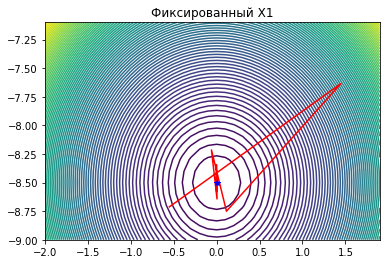

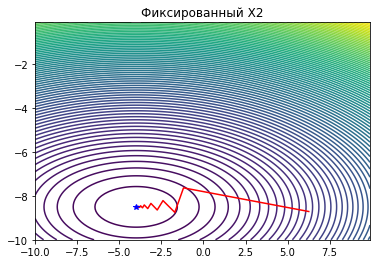

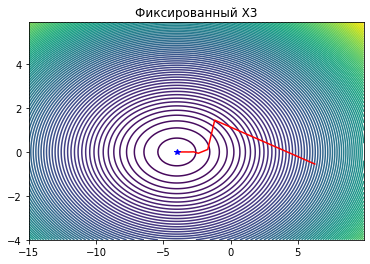

In [ ]:
dots_for_x0_x2=[]
dots_for_x1_x2=[]
dots_for_x0_x1=[]
h = 0.001
c = 0.001
x1 = np.zeros(3)
x0 = [8, -2, 6]
eps = 0.001
p = grad_p(x0) 
a , b = unimodality(x0, p, c, h)
alpha = SquareInter(a, b, 0.001, x0, p)
x1 = x0 - alpha * p
graph_for_x0_x2 = [x1[0], x1[2]]
graph_for_x1_x2 = [x1[1], x1[2]]
graph_for_x0_x1 = [x1[0], x1[1]]
i = 1
dots_for_x0_x2.append(graph_for_x0_x2)
dots_for_x1_x2.append(graph_for_x1_x2)
dots_for_x0_x1.append(graph_for_x0_x1)
while True:
    p = grad_p(x1)
    a , b = unimodality(x1, p, c, h)
    alpha = SquareInter(a, b, h, x1, p)
    x0 = x1
    x1 = x0 - alpha * p
    i += 1
    graph_for_x0_x2 = [x1[0], x1[2]]
    graph_for_x1_x2 = [x1[1], x1[2]]
    graph_for_x0_x1 = [x1[0], x1[1]]
    dots_for_x0_x2.append(graph_for_x0_x2)
    dots_for_x1_x2.append(graph_for_x1_x2)
    dots_for_x0_x1.append(graph_for_x0_x1)
    if np.linalg.norm(x1-x0)/np.linalg.norm(x0) < eps:
        x_min = x1
        print('Итераций: %d' %i)
        print('Минимум функции равен: %f' %func(x1))
        for i in range(3):
            print('x%d : %e' %(i+1,x1[i]), end = '\t')
        break

def f_for_plot_fixX0(x1,x2):
    x0 = x_min[0]
    return x0**2 + 8*x0 + 5*x1**2 + 7*x2**2 + 119.0*x2 + 531.75

def f_for_plot_fixX1(x0,x2):
    x1 = x_min[1]
    return x0**2 + 8*x0 + 5*x1**2 + 7*x2**2 + 119.0*x2 + 531.75

def f_for_plot_fixX2(x0,x1):
    x2 = x_min[2]
    return x0**2 + 8*x0 + 5*x1**2 + 7*x2**2 + 119.0*x2 + 531.75

xmin = x1[1]
ymin = x1[2]    
X,Y=np.array(dots_for_x1_x2).T
xlist,ylist=np.meshgrid(np.arange(-2,2,0.1),np.arange(-9,-7,0.1))
plt.contour(xlist,ylist,f_for_plot_fixX0(xlist,ylist),100)
plt.plot(X,Y,'-r')
plt.plot(xmin,ymin,'b*')
plt.title('Фиксированный X1')
plt.show()

xmin = x1[0]
ymin = x1[2]    
X,Y=np.array(dots_for_x0_x2).T
xlist,ylist=np.meshgrid(np.arange(-10,10,0.1),np.arange(-10,0,0.1))
plt.contour(xlist,ylist,f_for_plot_fixX1(xlist,ylist),100)
plt.plot(X,Y,'-r')
plt.plot(xmin,ymin,'b*')
plt.title('Фиксированный X2')
plt.show()

xmin = x1[0]
ymin = x1[1]    
X,Y=np.array(dots_for_x0_x1).T
xlist,ylist=np.meshgrid(np.arange(-15,10,0.1),np.arange(-4,6,0.1))
plt.contour(xlist,ylist,f_for_plot_fixX2(xlist,ylist),100)
plt.plot(X,Y,'-r')
plt.plot(xmin,ymin,'b*')
plt.title('Фиксированный X3')
plt.show()